In [ ]:
#!pip install pypdf
#!pip install chromadb

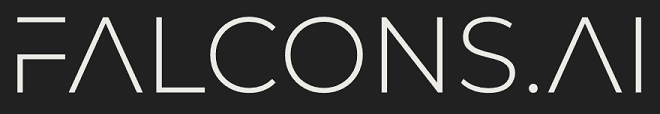

# Load and query a .csv with a VectorDB **** NO LLM necessary ****

In [27]:
from langchain.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.document_loaders import TextLoader
from langchain.document_loaders import PyPDFLoader
from langchain.document_loaders.csv_loader import CSVLoader

In [28]:
loader = CSVLoader(file_path='./htsdata.csv')
data = loader.load()

In [29]:
# split it into chunks
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.split_documents(data)

In [30]:
# create the open-source embedding function
embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
# load it into Chroma
db = Chroma.from_documents(docs, embedding_function)

# Query the DB

In [33]:
# query it
query = "HTS Numbers for beauty cosmetics"
docs = db.similarity_search(query)
# print results
print(docs[0].page_content)

HTS Number: 6211.49.03
Indent: 4
Description: Containing 70 percent or more by weight of silk or silk waste
Unit of Quantity: 
General Rate of Duty: 1.2%
Special Rate of Duty: Free (AU,BH,CL,CO,E,IL,JO,KR,MA,OM,P,PA,PE,S,SG)
Column 2 Rate of Duty: 35%
Quota Quantity: 
Additional Duties:


# Get VectorDB size

In [34]:
doc_ids = db.get()["ids"]
doc_ids

['3500e94a-693d-11ee-9484-6b69ef308793',
 '3500e9d6-693d-11ee-9484-6b69ef308793',
 '3500e9fe-693d-11ee-9484-6b69ef308793',
 '3500ea12-693d-11ee-9484-6b69ef308793',
 '3500ea26-693d-11ee-9484-6b69ef308793',
 '3500ea3a-693d-11ee-9484-6b69ef308793',
 '3500ea58-693d-11ee-9484-6b69ef308793',
 '3500ea6c-693d-11ee-9484-6b69ef308793',
 '3500ea80-693d-11ee-9484-6b69ef308793',
 '3500ea94-693d-11ee-9484-6b69ef308793',
 '3500eaa8-693d-11ee-9484-6b69ef308793',
 '3500eac6-693d-11ee-9484-6b69ef308793',
 '3500eada-693d-11ee-9484-6b69ef308793',
 '3500eaee-693d-11ee-9484-6b69ef308793',
 '3500eb02-693d-11ee-9484-6b69ef308793',
 '3500eb16-693d-11ee-9484-6b69ef308793',
 '3500eb2a-693d-11ee-9484-6b69ef308793',
 '3500eb3e-693d-11ee-9484-6b69ef308793',
 '3500eb52-693d-11ee-9484-6b69ef308793',
 '3500eb66-693d-11ee-9484-6b69ef308793',
 '3500eb7a-693d-11ee-9484-6b69ef308793',
 '3500eb8e-693d-11ee-9484-6b69ef308793',
 '3500ebac-693d-11ee-9484-6b69ef308793',
 '3500ebc0-693d-11ee-9484-6b69ef308793',
 '3500ebd4-693d-

# Clean up VectorDB

In [ ]:
db.delete(ids=doc_ids)